<h1>Aikasarjojen kuvailua ja analysointia</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Kaavioiden tyyliasetus (ei ole pakollinen)
plt.style.use('seaborn-whitegrid')

# Jotkin kirjastoversiot eivät osaa automaattisesti säätää jakoviivoja mielekkäällä tavalla
# Siispä tuunaan oman Locatorin ja Formatterin
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter

# Tätä käyttäen voin säätää kaavion vaaka-akselin jakoviivat 14 päivän välein
myLoc = MultipleLocator(14)

# Tätä käyttäen voin esittää kaavion vaaka-akselin jakoviivat muodossa 13/01
myFmt = DateFormatter('%d/%m')

<h2>Tiedostojen avaaminen</h2>

Elisan ja Telian kurssihistoriat ovat tiedostoissa
<ul>
    <li>jotka ovat csv-muotoisia</li>
    <li>joissa erotinmerkkinä (<b>sep</b>) on suomalaiseen tapaan puolipiste ;</li>
    <li>joissa desimaalipisteenä (<b>decimal</b>) on suomalaiseen tapaan pilkku ,</li>
    <li>joissa on alussa yksi dataan kuulumaton rivi, jota ei pidä ottaa mukaan (<b>skiprows</b>).</li>
</ul>

In [2]:
# Datojen avaaminen
elisa = pd.read_csv('http://taanila.fi/elisa.csv', sep = ';', decimal = ',', skiprows=1)
telia = pd.read_csv('http://taanila.fi/telia.csv', sep = ';', decimal = ',', skiprows=1)

# Katsotaan miltä data näyttää
elisa.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
0,2020-05-12,55.84,55.90,55.00,56.04,54.54,56.02,55.644,475560,26457067.27,3992,NaN
1,2020-05-11,55.26,55.34,54.76,55.88,54.32,55.12,55.161,422923,23328498.42,2989,NaN
2,2020-05-08,54.62,54.66,54.00,54.72,53.72,54.62,54.435,232821,12673084.50,1782,NaN
3,2020-05-07,53.40,53.46,54.18,54.32,53.04,53.62,53.528,428959,22960682.61,3577,NaN
4,2020-05-06,54.10,54.18,55.60,55.64,54.04,54.12,54.439,364779,19861304.24,3650,NaN


In [3]:
telia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
0,2020-05-12,3.088,3.091,3.054,3.098,3.033,3.098,3.078,982804,3024660.46,1029,NaN
1,2020-05-11,3.059,3.063,3.090,3.100,3.050,3.057,3.068,789912,2423424.15,955,NaN
2,2020-05-08,3.086,3.088,3.062,3.088,3.050,3.087,3.073,715194,2197628.11,860,NaN
3,2020-05-07,3.048,3.050,3.053,3.065,3.028,3.050,3.043,833788,2537557.20,944,NaN
4,2020-05-06,3.031,3.034,3.108,3.108,3.028,3.030,3.057,1114591,3406956.46,1292,NaN


<h2>Aikaleimat indeksiin</h2>

Aikaleimat täytyy muuntaa Pythonin ymmärtämään muotoon (<b>pd.to_datetime()</b>) ja siirtää dataframen indeksiin.

In [4]:
# Aikaleimat indeksiin
elisa.index = pd.to_datetime(elisa['Date'])
telia.index = pd.to_datetime(telia['Date'])

# Järjestys vanhimmasta uusimpaan
elisa = elisa.sort_index()
telia = telia.sort_index()

# Katsotaan onnistuiko
telia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
Date,,,,,,,,,,,,
2015-01-02,2015-01-02,5.300,5.305,5.34,5.36,5.285,5.305,5.308,1039894,5519434.117,792,NaN
2015-01-05,2015-01-05,5.205,5.215,5.29,5.30,5.205,5.205,5.248,929121,4876272.285,915,NaN
2015-01-07,2015-01-07,5.230,5.245,5.24,5.30,5.220,5.245,5.269,860595,4532003.330,621,NaN
2015-01-08,2015-01-08,5.405,5.410,5.26,5.41,5.260,5.405,5.329,1001285,5335848.695,684,NaN
2015-01-09,2015-01-09,5.290,5.295,5.40,5.42,5.290,5.295,5.354,917754,4913679.525,679,NaN


<h2>Viivakaavioita</h2>

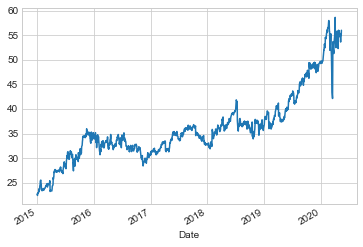

In [5]:
elisa['Closing price'].plot()

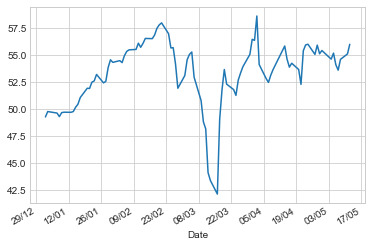

In [6]:
# Vuoden 2020 alusta
ax1 = elisa['Closing price']['2020':].plot()

# Aika-akselin jakoviivojen tuunaus
ax1.xaxis.set_major_locator(myLoc)
ax1.xaxis.set_major_formatter(myFmt)

<b>resample()</b> aggregoi aikasarjan esimerkiksi päivätasolta kuukausitasolle. Seuraavassa esitetään kuukausikeskiarvot.

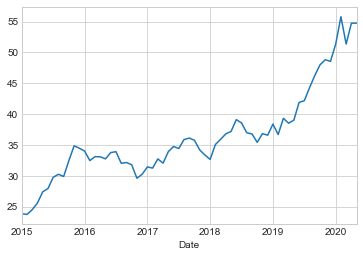

In [7]:
# Kuukausittaiset keskiarvohinnat
elisa['Closing price'].resample('M').mean().plot()

<b>resample()</b>-toiminnon parametrina käytettäviä arvoja: 
    
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
        

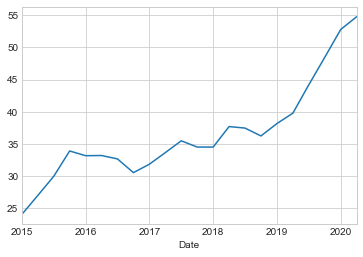

In [8]:
# Vuosineljännesten keskiarvohinnat
elisa['Closing price'].resample('Q').mean().plot()

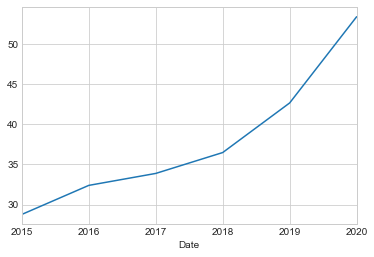

In [9]:
# Vuosien keskiarvohinnat
elisa['Closing price'].resample('Y').mean().plot()

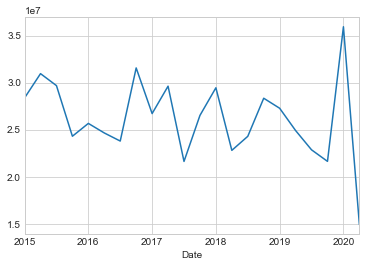

In [10]:
# Vaihto osakkeiden lukumääränä vuosineljänneksittäin
elisa['Total volume'].resample('Q').sum().plot()

<h2>Liukuvia keskiarvoja</h2>

Liukuvilla keskiarvoilla tasoitetaan yksittäisiin ajankohtiin liittyviä satunnaisia piikkejä.

Teknisessä analyysissä aikasarjan ja liukuvien keskiarvojen leikkauskohtia käytetään osto- ja myyntisignaaleina.

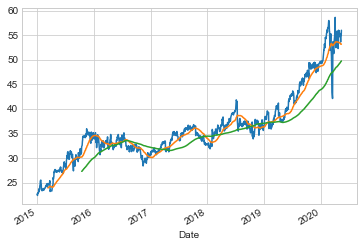

In [11]:
elisa['Closing price'].plot()

# Lisätään viivakaavioon 50 päivän ja 200 päivän liukuvat keskiarvot
elisa['Closing price'].rolling(50).mean().plot()
elisa['Closing price'].rolling(200).mean().plot()

<h2>Muutosprosentit</h2>

Muutosprosentit on kätevää laskea <b>pct_change()</b>-funktiolla.

In [12]:
# Hinnan muutokset prosentteina edellisestä päivästä
elisa['Elisa%'] = elisa['Closing price'].pct_change()
telia['Telia%'] = telia['Closing price'].pct_change()

In [13]:
# Yhdistän Elisan ja Telian muutosprosentit samaan dataframeen
muutokset = pd.concat([elisa['Elisa%'], telia['Telia%']], axis = 1)
muutokset.head()

,Elisa%,Telia%
Date,,
2015-01-02,NaN,NaN
2015-01-05,-0.012346,-0.018850
2015-01-07,0.023214,0.007685
2015-01-08,-0.003927,0.030505
2015-01-09,0.001314,-0.020352


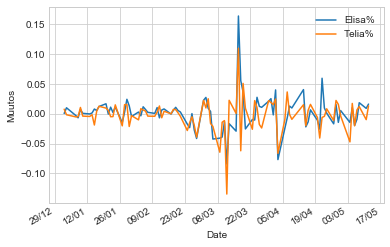

In [14]:
# Muutokset vuoden alusta
ax2 = muutokset['2020':].plot()

ax2.set_ylabel('Muutos')

# Aika-akselin jakoviivojen tuunaus
ax2.xaxis.set_major_locator(myLoc)
ax2.xaxis.set_major_formatter(myFmt)

In [15]:
# Tunnuslukuja muutosprosenteille
muutokset.describe()

,Elisa%,Telia%
count,1344.000000,1344.000000
mean,0.000790,-0.000296
std,0.015296,0.014367
min,-0.092226,-0.134499
25%,-0.006348,-0.006940
50%,0.000890,-0.000494
75%,0.008058,0.007358
max,0.164016,0.109976


In [16]:
# Päivät, jolloin muutosprosentti ollut suurempi kuin 5 %
muutokset[(abs(muutokset['Elisa%']) > 0.05) | (abs(muutokset['Telia%']) > 0.05)]

,Elisa%,Telia%
Date,,
2015-03-27,-0.075697,-0.012712
2015-04-09,0.011499,-0.066554
2015-04-16,0.055984,0.006346
2015-08-24,-0.055172,-0.058611
2015-08-25,0.065693,0.047335
2015-09-03,0.057869,0.032323
2015-09-25,0.061796,0.025510
2016-01-22,0.051540,0.037919
2016-04-01,-0.052092,-0.009645


<h2>Onko viikonpäivällä yhteyttä tuottoprosenttiin?</h2>

In [17]:
# Viikonpäivät omaan sarakkeeseen (0 = maanantai)
muutokset['Weekday'] = muutokset.index.weekday

muutokset.groupby('Weekday')['Elisa%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,267.0,0.001107,0.013506,-0.055172,-0.005134,0.000842,0.007842,0.057805
1,272.0,0.001424,0.016388,-0.038976,-0.006934,0.000691,0.007790,0.164016
2,273.0,0.001073,0.013395,-0.053899,-0.005659,0.000359,0.008081,0.059656
3,270.0,0.000712,0.016206,-0.084077,-0.006738,0.001115,0.008628,0.068757
4,262.0,-0.000408,0.016717,-0.092226,-0.006363,0.001135,0.007727,0.061796


In [18]:
muutokset.groupby('Weekday')['Telia%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,267.0,-0.000988,0.014703,-0.079728,-0.007445,-0.001145,0.007258,0.039216
1,272.0,0.000783,0.014157,-0.040565,-0.006406,-0.000503,0.007406,0.109976
2,273.0,-0.000202,0.012127,-0.061963,-0.006093,-0.000533,0.007426,0.042407
3,270.0,-0.001198,0.016089,-0.134499,-0.007937,-0.000122,0.006882,0.051014
4,262.0,0.000119,0.014525,-0.066333,-0.007024,0.000508,0.008030,0.083107


<h2>Muutosprosenttien välinen korrelaatio</h2>

In [19]:
# Elisan ja Telian muutosprosentit korreloivat positiivisesti
muutokset.drop('Weekday', axis = 1).corr()

,Elisa%,Telia%
Elisa%,1.00000,0.50687
Telia%,0.50687,1.00000


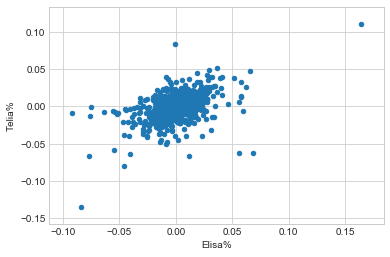

In [20]:
# Muutosprosenttien positiivinen korrelaatio näkyy hyvin hajontakaaviossa
muutokset.plot.scatter(x = 'Elisa%', y = 'Telia%')

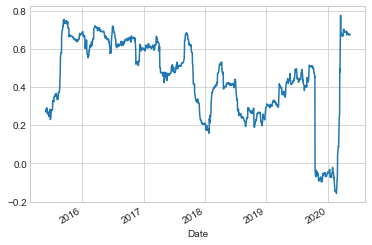

In [21]:
# Liukuva korrelaatio kertoo miten muutosprosentit korreloivat eri aikoina
muutokset['Elisa%'].rolling(100).corr(muutokset['Telia%']).plot()

<h2>Liukuva volatiliteetti</h2>

Volatiliteetti kuvaa osakkeeseen liittyvää riskiä.

Volatiliteetti voidaan laska päivittäisten muutosprosenttien keskihajontana ja se skaaltaaan vuositasolle kertomalla vuoden kaupantekopäivien lukumäärän neliöjuurella.

Liukuva volatiliteetti kuvaa, miten volatiliteetti on muuttunut ajan kuluessa.

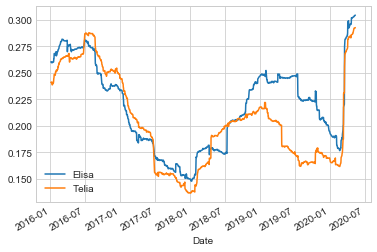

In [22]:
# 252 päivän liukuva volatiliteetti
(muutokset['Elisa%'].rolling(252).std() * (252**0.5)).plot(label = 'Elisa', legend = True)
(muutokset['Telia%'].rolling(252).std() * (252**0.5)).plot(label = 'Telia', legend = True)

<h2>Kahden arvoakselin viivakaavio</h2>

(3, 7)

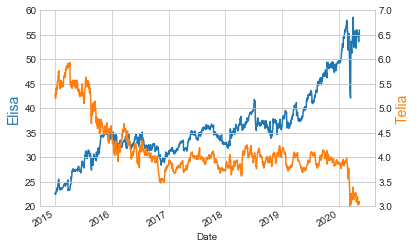

In [23]:
# Viivakaavio Elisan päätöshinnoista (ax3)
ax3 = elisa['Closing price'].plot(color = 'C0')
ax3.set_ylabel('Elisa', color='C0', fontsize=14)
ax3.set_ylim(20,60)

# Luon Telialle toisen axes-olion (ax4), jolla on yhteinen x-akseli ax3-olion kanssa
ax4 = ax3.twinx()
telia['Closing price'].plot(ax = ax4, color='C1')
ax4.set_ylabel('Telia', color='C1', fontsize=14)
ax4.set_ylim(3,7)